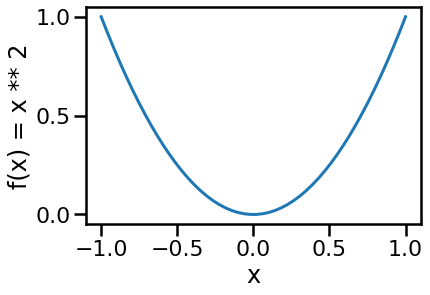

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('poster')

# Plot f(x) = x **2
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2');

Text(0, 0.5, 'f)x) = X **2')

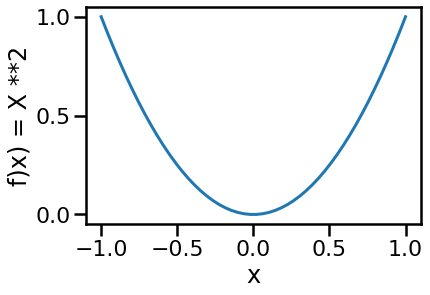

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('poster')

xs= np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f)x) = X **2')

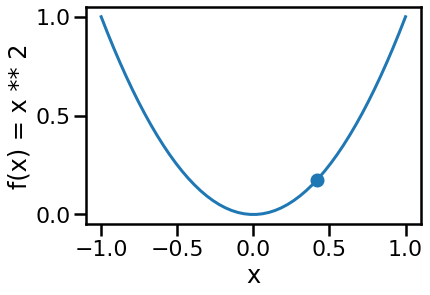

In [3]:
# plot f(x) = x**2
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2')


# plot point at x, f(x)
# choose x randomly
x = np.random.uniform(-1, 1)
y = x**2
plt.scatter(x, y);

Gradient: 0.09461983515698424
Shift to the left


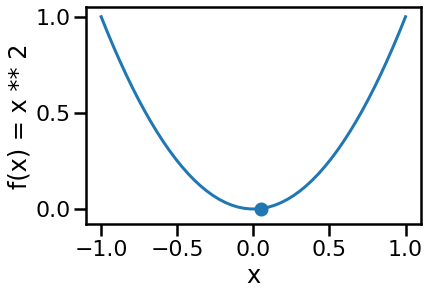

In [4]:
# plot f(x) = x**2
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2')


# plot point at x, f(x)
# choose x randomly
x = np.random.uniform(-1, 1)
y = x**2
plt.scatter(x, y)

# calculate derivative
derivative = 2*x
print('Gradient:', derivative)

if derivative > 0:
    print('Shift to the left')
    
elif derivative < 0:
    print('Shift to the right')
    
else:
    print(f'x={x} minimizes the value of this function')

In [5]:
from ipywidgets import interact

def check_slope(x=np.random.uniform(-1,1)):
    # plot f(x) = x**2
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares)
    plt.xlabel('x')
    plt.ylabel('f(x) = x ** 2')
    
    # plot point at x, f(x)
    y = x ** 2
    plt.scatter(x, y)
    
    # calculate derivative
    derivative = 2 * x
    print('Gradient:', derivative)
    
    # print instruction for what direction step to take
    if derivative > 0:
        print('Shift to the left')
        
    elif derivative < 0:
        print('Shift to the right')
        
    else:
        print(f'x={x} minimizes the value of this function')
        
interact(check_slope, x=(-1,1,0.1));

interactive(children=(FloatSlider(value=0.041234667841897554, description='x', max=1.0, min=-1.0), Output()), …

In [6]:
iterations = 20
learning_rate = 0.1
x = np.random.uniform(-1, 1)

for _ in range(iterations):
    gradient = 2*x  # derivative of f(x) = x**2
    x += learning_rate * -gradient
    print(x)

-0.09390863157544356
-0.07512690526035484
-0.06010152420828387
-0.0480812193666271
-0.038464975493301676
-0.03077198039464134
-0.02461758431571307
-0.019694067452570456
-0.015755253962056365
-0.012604203169645093
-0.010083362535716074
-0.008066690028572859
-0.006453352022858287
-0.00516268161828663
-0.004130145294629304
-0.003304116235703443
-0.0026432929885627544
-0.0021146343908502035
-0.0016917075126801628
-0.0013533660101441303


In [7]:
def gradient_descent(start_at=np.random.uniform(-1,1), 
                     iterations=20, 
                     learning_rate=0.1):
    # plot f(x) = x**2
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares, color='grey')
    plt.xlabel('x')
    plt.ylabel('f(x) = x ** 2')
    
    x = start_at
    for _ in range(iterations):
        gradient = 2*x # derivative of f(x) = x**2
        x += learning_rate * -gradient
        y = x**2
        plt.scatter(x, y, color='grey', edgecolor='black', zorder=3)
    
interact(gradient_descent, 
         start_at=(-1,1,0.5), 
         iterations=(1,20,1), 
         learning_rate=(0.05,0.96,0.05));

interactive(children=(FloatSlider(value=-0.08777232386065448, description='start_at', max=1.0, min=-1.0, step=…

In [54]:
from ipywidgets import fixed

data = sns.load_dataset('anscombe').query('dataset=="I"')

def linear_regression(m=0.5, b=3):
    # Plot the data
    sns.relplot(x='x', y='y', data=data)
    
    # Plot the line y = mx + b
    y_pred = m * data['x'] + b
    plt.plot(data['x'], y_pred)
    plt.show()
    
    # Plot the sum of squared errors for the line y = mx + b
    error = y_pred - data['y']
    sse = np.sum(error ** 2)
    plt.scatter(m, sse)
    
    # Plot the cost function, as a function of slope
    slopes = np.linspace(start=-1, stop=2)
    sses = []
    for slope in slopes:
        y_pred = slope * data['x'] + b
        error = data['y'] - y_pred
        sse = np.sum(error ** 2)
        sses.append(sse)
    
    plt.plot(slopes, sses)
    plt.title(f'Intercept={b}')
    plt.xlabel('Slope')
    plt.ylabel('Sum of Squared Error')

    plt.show() 
    
interact(linear_regression, m=(-1,2,0.1), b=fixed(3));

interactive(children=(FloatSlider(value=0.5, description='m', max=2.0, min=-1.0), Output()), _dom_classes=('wi…

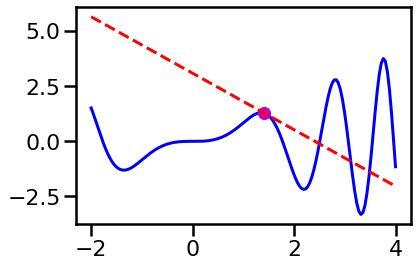

In [51]:
from numpy import sin,linspace,power
from pylab import plot,show

def f(x): # sample function
 return x*sin(power(x,2))

# evaluation of the function
x = linspace(-2,4,150)
y = f(x)

a = 1.4
h = 0.1
fprime = (f(a+h)-f(a))/h # derivative
tan = f(a)+fprime*(x-a)  # tangent

# plot of the function and the tangent
plot(x,y,'b',a,f(a),'om',x,tan,'--r')
show()

In [9]:
def descent(theta, alpha, x, y):
    intercept = theta[0]
    slope = theta[1]
    
    def hypothesis(x): return slope * x + intercept
    error = hypothesis(x) - y
    
    partial_derivative_intercept = np.mean(error)
    partial_derivative_slope = np.mean(error * x)
    
    intercept = intercept - alpha * partial_derivative_intercept
    slope = slope - alpha * partial_derivative_slope
    
    theta = intercept, slope
    return theta

In [10]:
# Use gradient descent to fit y = -20x + 5
x = np.linspace(-50, 50)
y = -20*x + 5

theta = [np.random.uniform(), np.random.uniform()]
alpha = 0.001

for _ in range(10000):
    theta = descent(theta, alpha, x, y)
    
intercept, slope = theta
print(f'y = {slope}*x + {intercept}')

y = -20.0*x + 4.99980146082132


y = 0.5013104298107741*x + 2.987774945543761


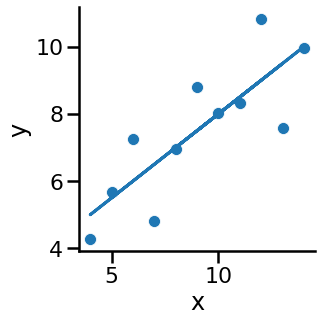

In [11]:
# Use gradient descent to fit Anscombe's Quartet
data = sns.load_dataset('anscombe').query('dataset=="I"')
sns.relplot(x='x', y='y', data=data)

theta = [np.random.uniform(), np.random.uniform()]
alpha = 0.01 # learning rate
for _ in range(5000):
    theta = descent(theta, alpha, data['x'], data['y'])
    
intercept, slope = theta
print(f'y = {slope}*x + {intercept}')

y_pred = slope * data['x'] + intercept
plt.plot(data['x'], y_pred);